In [1]:
import requests
import json
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

ModuleNotFoundError: No module named 'matplotlib'

### Pulling down from new API

In [1]:
today = datetime.now().date().isoformat()

url = "API_URL"

today = datetime.now().date().isoformat()

for make in makes:
    
    querystring = {"make":make,"date":today}

    payload = ""
    headers = {"x-api-key": "API_KEY"}

    response = requests.request("GET", url, data=payload, headers=headers, params=querystring)

    res = json.loads(response.text)
    
    print("{}: {}".format(make, len(res)))

NameError: name 'datetime' is not defined

In [4]:
makes = [
    "acura",
    "buick",
    "cadillac",
    "chevrolet",
    "chrysler",
    "gmc",
    "ford",
    "honda",
    "infiniti",
    "jeep",
    "kia",
    "mitsubishi",
    "nissan",
    "porsche",
    "ram",
    "subaru",
    "toyota",
    "volkswagen",
    "volvo",
    "alfa_romeo",
    "rolls_royce",
    "mini",
    "fiat",
    "aston_martin",
    "maserati",
    "bmw",
    "mercedes_benz"
]


headers = {
    'x-api-key': 'API KEY'
}

all_cars = []

for i in makes:
    
    params = {
        'make': i,
    }


    res = requests.get('API URL', headers = headers, params=params)



    output = json.loads(res.content)

    all_cars += output



In [1]:
data_all = []

files = listdir('data')

for i in files:

    file_path = "data/{}".format(i)
    
    df = pd.read_csv(file_path, on_bad_lines = 'skip')
    df['Make'] = i[:-4]
    df = df.drop(columns=["Unnamed: 0"])
    
    data_all.append(df)
    
df = pd.concat(data_all, axis = 0, ignore_index=True)



#df = pd.DataFrame(all_cars, columns = ['Id', 'Date', "Model", 'Make', 'Mileage', 'Dealer', 'Dealer Rating', 'Rating Count', 'Price', 'Year'])

NameError: name 'listdir' is not defined

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18912 entries, 0 to 18911
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             18912 non-null  int64  
 1   Date           18912 non-null  object 
 2   Model          18912 non-null  object 
 3   Make           18912 non-null  object 
 4   Mileage        18912 non-null  int64  
 5   Dealer         18912 non-null  object 
 6   Dealer Rating  18912 non-null  float64
 7   Rating Count   18912 non-null  int64  
 8   Price          18818 non-null  float64
 9   Year           18912 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.4+ MB


In [7]:
print(min(df['Date']), max(df['Date']))

2022-05-13 2022-06-15


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

#### Possible Viz's

- Listings of each car make and their price in the past week

- Select one car make-model from a drop-down menu and check how the average price listing has been, avg with # listings - recent week
- mileage to price correlation for each make - recent week 
- donut chart for each different model



- Make some linear regression with car models, price

### Example of one model: Acura

In [9]:
df_acura = df[df['Make'] == 'Acura']

### Grabbing listings made since the last week

In [10]:
df_acura_week_recent = df_acura[df_acura['Date'] > max(df_acura['Date']) - timedelta(days=7)]
df_acura_week_recent

,Id,Date,Model,Make,Mileage,Dealer,Dealer Rating,Rating Count,Price,Year
674,17361,2022-06-09,2021 Acura TLX A-Spec,Acura,10673,Fresno Acura,4.6,138,53475.0,2021
675,17362,2022-06-09,2019 Acura MDX 3.5L,Acura,28774,Hendrick Southpoint Auto Mall,4.8,790,38998.0,2019
676,17363,2022-06-09,2020 Acura MDX 3.5L w/Technology Package,Acura,25244,Gary Force Acura,4.4,94,45995.0,2020
677,17364,2022-06-09,2020 Acura MDX 3.5L w/Technology Package,Acura,14261,Ron Tonkin Acura,4.7,132,49995.0,2020
678,17365,2022-06-09,2021 Acura RDX A-Spec,Acura,4437,Acura Of Bellevue,3.0,4,51418.0,2021
...,...,...,...,...,...,...,...,...,...,...
802,20166,2022-06-15,2020 Acura MDX 3.5L,Acura,28450,Hiley Acura,3.7,61,37064.0,2020
803,20167,2022-06-15,2019 Acura RDX Technology Package,Acura,24993,Autonation Acura South Bay,4.8,950,35990.0,2019
804,20168,2022-06-15,2016 Acura TLX Tech,Acura,75109,Jay Wolfe Acura,4.8,2395,22897.0,2016
805,20169,2022-06-15,2020 Acura RDX Advance Package,Acura,43490,Acura Of Ramsey,4.8,1761,41995.0,2020


In [11]:
df_acura_week_number_listings = df_acura_week_recent['Date'].value_counts()
df_acura_week_number_listings = pd.DataFrame(df_acura_week_number_listings)
df_acura_week_number_listings.columns = ['Number Listings']


### Simple overview of number of listings the past week

<AxesSubplot:ylabel='Number Listings'>

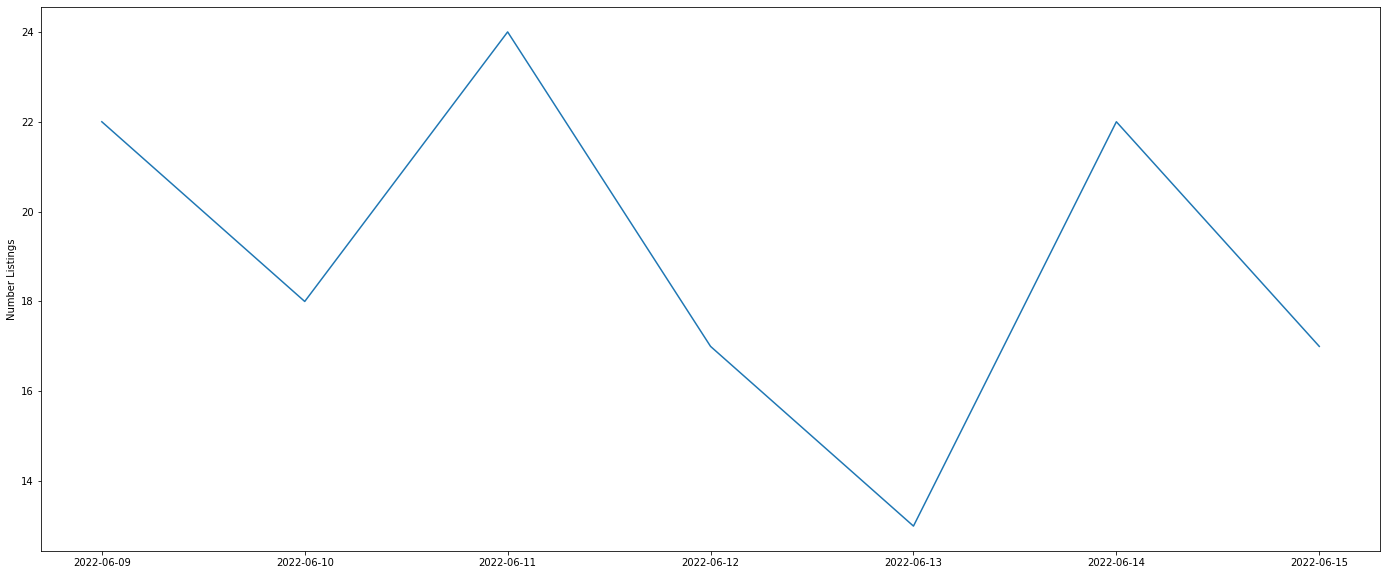

In [12]:
plt.figure(figsize=(24,10))
sns.lineplot(data = df_acura_week_number_listings, x = df_acura_week_number_listings.index , y = 'Number Listings')

<AxesSubplot:xlabel='Date', ylabel='Price'>

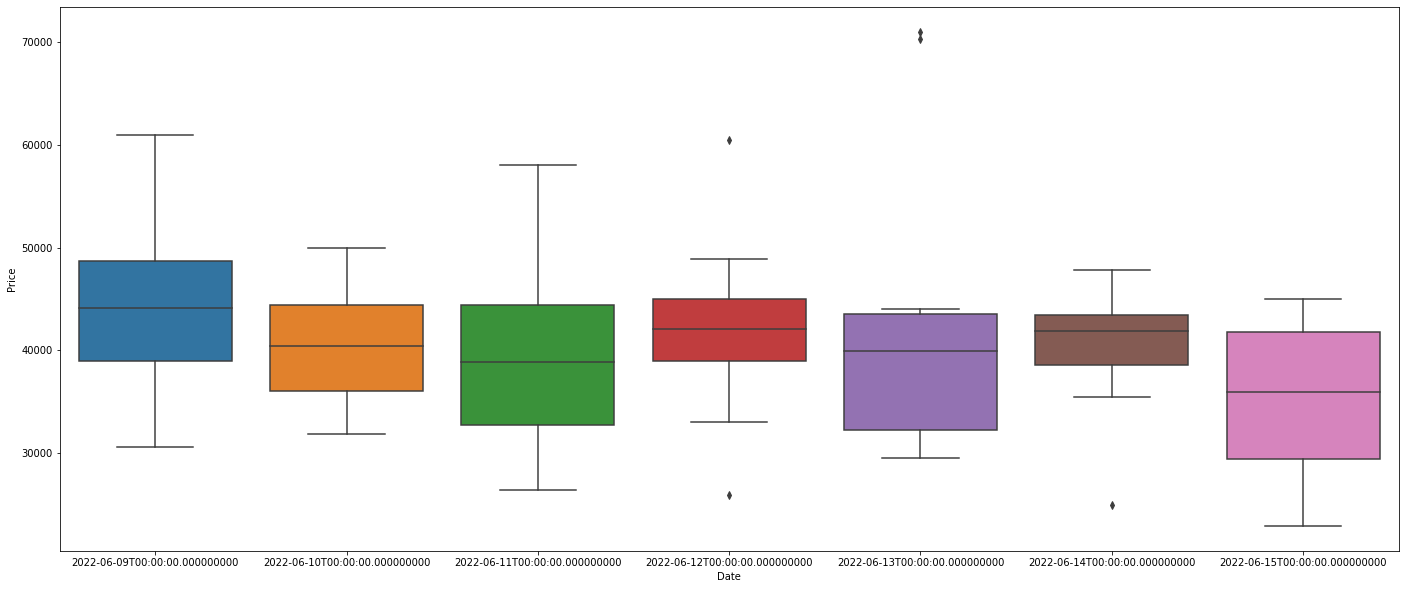

In [17]:
plt.figure(figsize=(24,10))
sns.boxplot(data = df_acura_week_recent, x = 'Date' , y = 'Price')

<AxesSubplot:xlabel='Date', ylabel='Price'>

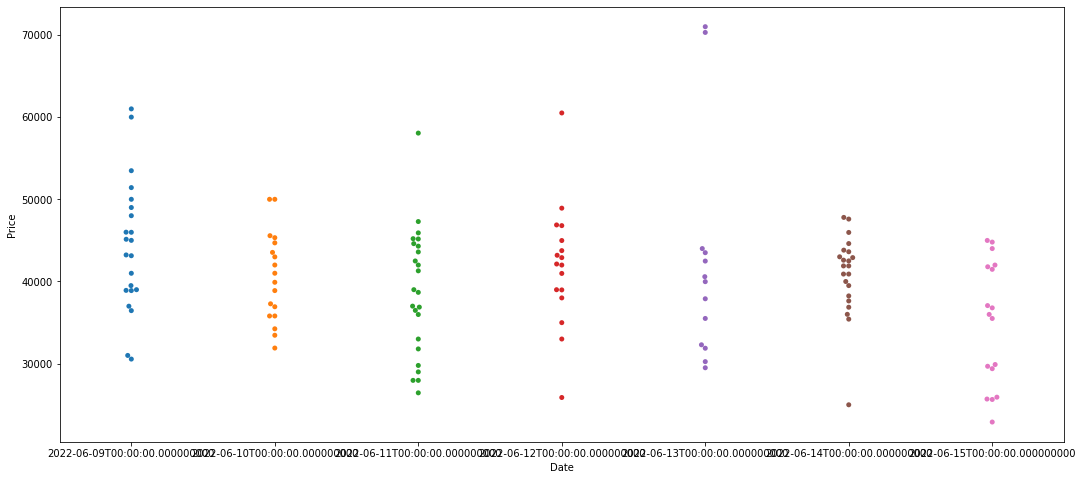

In [13]:
df_acura_week_recent.groupby(['Date', 'Model'])['Model'].value_counts().unstack()
# sns.lineplot(df_acura_week_recent.groupby(['Date', 'Model'])['Model'].value_counts().unstack())

plt.figure(figsize=(18,8))
sns.swarmplot(data = df_acura_week_recent, x = 'Date', y='Price')


In [14]:
df_acura['Model'].value_counts()

2020 Acura MDX 3.5L w/Technology Package    89
2020 Acura MDX 3.5L                         78
2019 Acura RDX Base                         58
2019 Acura MDX 3.5L                         42
2021 Acura RDX A-Spec                       40
                                            ..
2022 Acura MDX Advance Package               1
2019 Acura TLX V6 w/Technology Package       1
2018 Acura MDX 3.5L                          1
2021 Acura TLX Type S                        1
2016 Acura TLX Tech                          1
Name: Model, Length: 85, dtype: int64

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

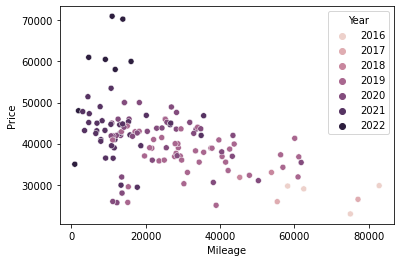

In [15]:
sns.scatterplot(data = df_acura_week_recent, x = 'Mileage', y = 'Price', hue = 'Year')

In [16]:
df_acura_week_recent.corr()

,Id,Mileage,Dealer Rating,Rating Count,Price,Year
Id,1.000000,0.075261,0.135679,0.094121,-0.220473,-0.141525
Mileage,0.075261,1.000000,0.099132,0.168646,-0.478086,-0.742479
Dealer Rating,0.135679,0.099132,1.000000,0.375120,-0.118595,-0.088439
Rating Count,0.094121,0.168646,0.375120,1.000000,-0.180405,-0.138463
Price,-0.220473,-0.478086,-0.118595,-0.180405,1.000000,0.623699
Year,-0.141525,-0.742479,-0.088439,-0.138463,0.623699,1.000000


# Ideas for Viz

